这一篇是接着之前的基础篇，主要讨论下创建函数、常用函数的使用、闭包(closure)的使用场景和装饰器(decorator)。

# 目录

1. 构建函数时如何设置默认参数？
2. 如何理解函数中\*args和\**kwargs？
3. def log(msg, dt=datetime.now())调用函数为什么dt不是当前时间？
4. def foo(x, alist=[ ])可变数据类型(mutable)作为默认参数导致的问题。
5. lambda和sorted()的组合使用。
6. 什么是列表解析(list comprehensions)？
7. 如何理解python中的闭包和使用场景。
8. 什么是装饰器(Decorator)？

## 构建函数时如何设置默认参数？

设置默认参数只需要在构建函数时指定默认值。我们来看一个例子：

In [1]:
def my_func(x, y = 5):
    return f'{x}, {y} are entered!'

a = 20
b = 60
# 调用函数并使用默认参数。
print(my_func(a))
# 调用函数，并指定第二个参数的值
print(my_func(a, b))
# python支持以位置或者指定参数名输入。
# 使用指定参数名输入可以随意交换输入参数的位置。
print(my_func(y = b, x = a))

20, 5 are entered!
20, 60 are entered!
20, 60 are entered!


在这里例子中我们设置了默认参数y=5，所以y是可选输入参数。即使只输入x而没有输入y，函数也可以成功调用。此外，从上面例子可以看出在输入参数时指定参数名可以随意交换输入参数的位置。

那我们在默认参数后再加一个参数会怎么样呢？

In [2]:
def my_func(x, y=5, z):
    return f'{x}, {y}, {z} are entered!'
print(my_func(5,10, 20))

SyntaxError: non-default argument follows default argument (<ipython-input-2-46f294ce8cdf>, line 1)

加了一个非默认参数后出现了语法错误：非默认参数跟随在默认参数后面。

这里要注意所有默认参数必须放在最后，如果有非默认参数放在默认参数后（比如my_func(x, y=5, z)，或者my_func(x, y=6, z=10, k)）则会报错。

## 如何理解函数中\*args和\**kwargs？

我们肯定在查阅python三方包的时候见过类似my_func(\*args, \*\*kwargs)的输入参数。要理解\*args, \*\*kwargs我们要先理解什么是packed values和unpacking packed values。

简单来说任何可循环对象(iterable，比如元组，列表，字符串，集合和字典等)都可以看作packed values。而unpacking packed values就是指把packed values拆分（指让几个变量指向可循环对象中的单一元素）给单一变量的过程。

In [24]:
# 比如把一个元组中的三个数值赋值给a, b, c 
a, b, c = (5, 6, 7)
print(a, b, c)
# 把字符串中的每个字符赋值给a, b, c
a, b, c = 'yes'
print(a, b, c)
# 尝试把有３个元素的元组赋值给２个参数
a, b = (5,6,7)

5 6 7
y e s


ValueError: too many values to unpack (expected 2)

我们看到当unpack 3个元素给2个变量时，出现了数值错误(ValueError)，所以这种unpack方式必须使等式左侧和右侧数量相同。但有时候我们想要把３个值拆分给２个变量，这时候就需要用到\*。\*的作用可以理解为把一个循环体(iterable)中每个元素拆分开为单独的对象。

我们用几个简单的例子来看下unpack的应用。

In [27]:
# *在右边使用，*b可以理解为拆开b后等于3个单独的对象'o','t','e'
# 所以b = ['o', 't', 'e']
a, *b, c= ('p','o','t','e','n')
print(*b)
print(a, b, c)
# *可以在右边使用，拆开循环体后可以用来组成新的循环体。
a = 'ab'
b = 5,6
c = 'g'
x = [*a, *b, *c]
print(x)

o t e
p ['o', 't', 'e'] n
['a', 'b', 5, 6, 'g']


同样的，\*\*的作用是把字典拆分开把每个key加上value作为一个单独的对象。但是与\*不同的是\*\*只能用在等式右侧，而且当有重复key出现的使用，后出现的值会覆盖之前的值。

In [28]:
# **只能在右侧使用
a = {'k':1, 'p':2}
b = {'g':4, 'p':5, 'k':10}
# 有重复的key，这里字典b在a后面
# 所以key p和k的值更新为字典b里对应key的值。
c = {**a, **b}
print(c)

{'k': 10, 'p': 5, 'g': 4}


了解了\*和\*\*的用法后，\*args和\*\*kwargs就很好理解了。\*args相当于拆开args，所以输入的对应位置参数[(positional arguments)](https://problemsolvingwithpython.com/07-Functions-and-Modules/07.07-Positional-and-Keyword-Arguments/#:~:text=Positional%20arguments%20are%20arguments%20that,positional%20argument%20listed%20third%2C%20etc.)等于一个被拆开的元组(tuple)，而\*\*kwargs就相当于拆开字典，输入的对应关键词参数(Keyword Arguments)等于一个被拆开的字典。此外，在定义函数的时候args或者kwargs可以用其他变量名代替。

In [29]:
# 这里使用values和kw_values，在有些情况下
# 使用更有意义的参数命名方法是推荐的。
def foo(a,*values, **kw_values):
    print(a)
    print(f'These values are entered：{values}')
    print(f'These key words are entered：{kw_values}')

# values = (5,7,8)
# kw_values = {'kw1': 'y', 'kw2': 'e', 'lw3': 's'}
foo('I am a', 5, 7, 8, kw1 = 'y', kw2 = 'e', lw3 = 's')

I am a
These values are entered：(5, 7, 8)
These key words are entered：{'kw1': 'y', 'kw2': 'e', 'lw3': 's'}


在这个例子中我们看到，没有参数名的5,7,8是位置参数组成一个元组对应values，而kw1 = 'y', kw2 = 'e', lw3 = 's'是关键词参数组成一个字典对应kw_values。

需要注意的是在\*args后不能再输入位置参数，只能接收关键词参数。否则会出现类型错误(TyepError)。

In [30]:
# 在*values后还可以加其他参数。
def foo(a,*values, b):
    print(a)
    print(f'These values are entered：{values}')
    print(f'These key words are entered：{b}')

# 但是在使用的时候，只能接收关键词参数。
foo('I am a', 5, 7, 8, b = 8)
foo('I am a', 5, 7, 8, 8)

I am a
These values are entered：(5, 7, 8)
These key words are entered：8


TypeError: foo() missing 1 required keyword-only argument: 'b'

## def log(msg, dt=datetime.now())调用函数为什么dt不是当前时间？

在定义函数的时候有一个非常重要的点：默认参数的设定<font color='red'>只发生在定义函数的时候，而不是这个函数被调用的时候</font>。

我们定义一个题目的函数看看是否是这样的。

In [31]:
from datetime import datetime
def log(msg, dt=datetime.now()):
    return f'{dt}:{msg}'

print(log('This is a test'))
print(log('This is a test'))

2020-09-07 18:19:30.904485:This is a test
2020-09-07 18:19:30.904485:This is a test


可以看到在调用函数的时候2次输出时间都是完全一样的，说明dt=datetime.now()是在定义函数的时候被评估的。那我们应该如何设置这个默认参数呢？一般的做法是把默认值设置为None来达到我们的目的。

In [4]:
def log(msg, dt=None):
    if not dt:
        dt = datetime.now()
    return f'{dt}:{msg}'
#这即支持自定义dt的值，又可以在不输入dt时使用now()。
print(log('This is a test.'))
print(log('This is a test.'))

2020-09-07 17:33:32.686061:This is a test.
2020-09-07 17:33:32.686139:This is a test.


使用这种解决方式，每次调用函数都会重写计算dt，从而避免了题目描述的错误。

## def foo(x, alist=[ ])可变数据类型(mutable)作为默认参数导致的问题。

def foo(x, alist=[ ])中，默认参数alist=[ ]只有定义函数的时候被评估。所以在调用时，alist依旧是定义函数时的同一个列表，即使我们重写调用函数alist不会被清空。

In [5]:
# 定一个fruit函数
def fruit(x, alist = []):
    """添加x到alist中。"""
    alist.append(x)
    return alist
# 调用fruit加入apple
all_fruit = fruit('apple')
# 再次调用假如pear
fruit('pear')
print(all_fruit)

['apple', 'pear']


In [6]:
# 创建新的fruit
new_fruit = fruit('orange')
print(new_fruit)

['apple', 'pear', 'orange']


从上面例子我们看到，即使我们重写调用函数第二个new_fruit的列表还是包含了all_fruit里的所有对象。原因就是alist对象是在定义的时候被创建的，即使重新调用(new_fruit = fruit('orange'))，alist依旧是创建fruit函数时候的list对象，而又因为list是可变类型(mutable type)，调用函数的时候就会把新的对象添加到同一个默认列表中。

对于此类应用场景，我们会使用和第三问中一样的解决办法。

In [7]:
def fruit(x, alist = None):
    """添加x到alist中。"""
    if not alist:
        alist = []
    alist.append(x)
    return alist

all_fruit = fruit('apple')
#添加新水果到all_fruit的时候输入all_fruit
fruit('pear', all_fruit)
print(all_fruit)
new_fruit = fruit('orange')
print(new_fruit)

['apple', 'pear']
['orange']


## lambda和sorted()的组合使用。

lambda 是Python中使用率非常高的一个功能，它用于创建匿名函数（没有函数名的函数）。有时候我们只是临时性或者一次性使用一个函数，那就可以用lambda快速创建一个匿名函数。

In [33]:
# 比如这个简单的例子，把输入参数加１
lambda a: a+1

<function __main__.<lambda>(a)>

lambda的强大之处是可以和其他函数共用使得代码简洁易懂。这里我们看下lambda与Python常用函数sorted()的组合使用。

**例子一：排序大小写字母**

对一个包含大小字母的列表进行排序。

In [35]:
l = ['a', 'B', 'c', 'D', 'e', 'F']
sorted(l)

['B', 'D', 'F', 'a', 'c', 'e']

Python并没有按照我们的意愿进行字母排序，原因是大小不同不能进行字母排序。解决办法就是输入lambda函数给sorted的key参数。

In [38]:
# 把lambda x:x.upper()输入后相当于把每个对象转化成大写后再排序。
sorted(l, key = lambda x:x.upper())

['Aiden', 'April', 'Ashely', 'John', 'Mike', 'Musk']

**例子二：按照最后一个字母排序**

In [37]:
l = ['Aiden', 'Mike', 'April', 'Ashely', 'Musk', 'John']
# 取每个元素最后一个字符进行排序
sorted(l, key = lambda x:x[-1])

['Mike', 'Musk', 'April', 'Aiden', 'John', 'Ashely']

## 什么是列表解析(list comprehensions)？

[列表解析提供了一种简洁的方式去创建列表(list)](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)。在生成列表时用```[]```包裹起来，里面包含了表达式以及至少一个for语句，根据需要可以使用更多for或者if语句。使用一个for和if的简单形式可以表示为：
```[<expression> for <varname> in <iterable> if <condition>]```

接下来我们看几个列表解析的例子：

**例一：生成一个列表的平方**

给定一个列表，使用列表解析创建一个新的列表，使得每个元素都是自身的平方。

In [45]:
l = [4, 5, 6]
[n*n for n in l]

# 这个例子等于
# alist = []
# for n in l:
#     alist.append(n*n)
# print(alist)

[16, 25, 36]


**例二：获取两个列表对应位置的幂次方**

In [46]:
l1 = [7, 8, 9]
l2= [1, 2, 3]
[a**b for a,b in zip(l1,l2)]

# 这个例子等于
# alist = []
# for a,b in zip(l1, l2):
#     alist.append(a**b)
# print(alist)

[7, 64, 729]


**例三：找出所有偶数**

In [47]:
l = range(20)
[a for a in l if (a%2 == 0)&(a != 0)]

# 这个例子等于
# alist = []
# for a in l:
#     if (a%2 == 0)&(a != 0):
#         alist.append(a)
# print(alist)

[2, 4, 6, 8, 10, 12, 14, 16, 18]


**例四：转换嵌套列表成无嵌套列表**

In [48]:
l = [[1, 2], [3, 4, 5], [7, 8, 9, 10]]
[x for a in l for x in a]

# 这个例子等于
# alist = []
# for a in l:
#     for x in a:
#         alist.append(x)
# print(alist)

[1, 2, 3, 4, 5, 7, 8, 9, 10]

从上面例子可以看出转换嵌套列表成无嵌套列表相当于把一个嵌套循环写在一行，这样就非常容易理解啦。

**例五：矩阵转置**

这个是一个非常有意思的应用，有列表解析解决这个问题十分优雅、简洁。

In [49]:
m = [[1, 2, 3],
     [6, 7, 8]]
[list(r) for r in zip(*m)]

[[1, 6], [2, 7], [3, 8]]

通过上面的例子，我们看到使用列表解析可以使得代码非常简洁，这对于减少编程错误和提高代码可读性有很大帮助。

## 如何理解python中的闭包和使用场景。

在理解闭包前我们先看下python变量的**作用域**。我们平时所说的python代码都写在模块中，是一个 Python 文件，以 .py 结尾，包含了 Python 对象定义和Python语句。

当我们在模块中定义一个变量x=10，x就称为**全球变量**(global variable)，而x所在的值域称为**全球值域**(global scope)。然后我们再在模块中定义一个函数f1并且在f1中定一个变量y=20和一个函数inner，再在inner中定义一个z，则y和z都称为**局部变量**(local variable)，而y或者z所在的值域称为**局部值域**(local scope)，函数inner则称为内部函数或嵌套函数。

```python
x = 10                #全球变量
def f1(v):
    y = 20            #局部变量
    def inner():
        z = 'python'  #局部变量
        print(y)
    return inner
```
Python的值域是从模块向下包含的关系（如下图所示），就意味着在在模块层我们只能使用变量x而不能使用y；在f1函数中可以使用变量x和y，即使x没有在f1中定义；在函数inner中也可以使用变量x和y。

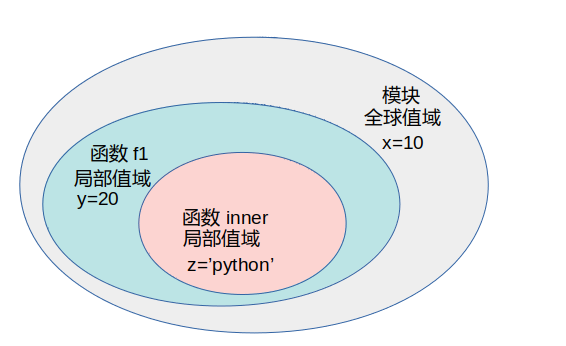

但是，如果我们想要在在局部值域改动全球变量x，则需要加上global x。如果不加global直接使用x = 40，则相当于在f1的局部值域创建了一个局部变量x，并且对局部变量x的改动并不会影响全球变量x。
```python
x = 10
def f1(v):
    #改变全球变量x,需要加上global x
    global x
    x = 40
    y = 20
    def inner():
        z = 'python'
        print(y)
    return inner
```
相似的，如果我们要在inner中改动f1局部值域下的局部变量y，我们则需要在inner中加上```nonlocal y```，这表明y不是inner的局部变量而是一个**非局部变量**(nonlocal variable)。
```python
x = 10
def f1(v):
    y = 20
    def inner():
        z = 'python'
        nonlocal y
        y = 50
        print(y)
    return inner
```
在了解了Python值域后，我们知道非局部变量y可以在inner中使用，即使它没有在inner中定义。这里y就称做一个**自由变量**[(free variables)](https://docs.python.org/3/reference/executionmodel.html#binding-of-names)。自由变量y加上内部函数inner就组成了一个闭包，所以可以简单地理解为**自由变量加上内部函数组成了闭包**。此外，在这个例子中f1函数返回了inner，其实就是返回了一个闭包（即自由变量y加上inner函数）。

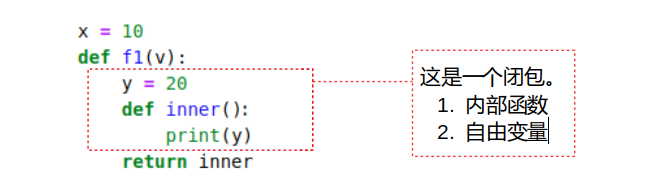

我们用例子来来看下：
1. f1中的y和闭包中的y是不是指向同一个对象？
2. f1返回的inner是不是一个闭包？

In [51]:
# hex(id(y))可以得到存储y的内存地址。
def f1():
    y = 'closure'
    print(hex(id(y)))
    def inner():
        print(hex(id(y)))
    return inner

# c为返回的inner
c = f1()
# 如果我们调用c，相当于调用inner()
c()
# 打印出c的closure属性。
print(c.__closure__)

0x7fe75a45bbb0
0x7fe75a45bbb0
(<cell at 0x7fe73ec2b5b0: str object at 0x7fe75a45bbb0>,)


从这个例子我们看到，返回的inner是一个closure（闭包），在这个closure中的y和f1函数下的定义的y最终指向的是同一个内存地址，即同一个对象。

这个例子中我们没有在inner中改动y的值（指向一个新的对象），如果需要在闭包中改动非局部变量的值，我们需要使用nonlocal。

In [52]:
# hex(id(y))可以得到存储y的内存地址。
def f1():
    y = 'closure'
    def inner():
        # 加上nonlocal y语句来改变非局部变量y。
        nonlocal y
        y = 'This is a ' + y
        return y
    return inner

# c为返回的inner
c = f1()
# 如果我们调用c，相当于调用inner()
print(c())
# 打印出c的closure属性。
print(c.__closure__)

This is a closure
(<cell at 0x7fe73ee71df0: str object at 0x7fe73e602f30>,)


在函数inner中加上nonlocal y后，我们就可以使自由变量指向新的对象，并且inner依旧是一个闭包。

我们接下来看一些闭包的使用场景。

**例一：计算平均值**

构建一个函数，每输入一个数则输出所有输入数的平均值。

In [53]:
# 第一步：构建一个外部函数。返回内部函数
def averager():
    """每输入一个数计算所有输入数的平均数。"""
    # 第二步：定义局部变量。
    total = 0
    count = 0
    # 第三步：构建一个内部函数
    def inner(num):
        # 使用nonlocal因为每次输入会更新变量的值。
        nonlocal total,count
        total += num
        count += 1
        return total/count
    return inner

avg = averager()
print(f'输入10后平均值是{avg(10)}')
print(f'输入30后平均值是{avg(30)}')
print(f'输入20后平均值是{avg(20)}')
print(f'输入60后平均值是{avg(60)}')

输入10后平均值是10.0
输入30后平均值是20.0
输入20后平均值是20.0
输入60后平均值是30.0


**例二：与平均分的差值**

构建一个函数，计算每个同学和平均分的差值。

In [54]:
# 第一步：构建一个外部函数。返回内部函数
def avg_dif(avg_score):
    """每次输入score输出它与avg_score的差值。"""
    # 第二步：定义局部变量。
    avg = avg_score
    # 第三步：构建一个内部函数
    def cal_dif(score):
        return score - avg
    return cal_dif

# 假设平均分是80分
dif = avg_dif(80)
print(f'第一个与平均分相差{dif(96)}')
print(f'第二个与平均分相差{dif(55)}')
print(f'第三个与平均分相差{dif(81)}')

第一个与平均分相差16
第二个与平均分相差-25
第三个与平均分相差1


通过上面的讲解和例子，我们对闭包有了一个初步的认识。接下来通过闭包我们要学习到Python中一个非常重要的功能————装饰器(Ｄecorator)。

## 什么是装饰器(Decorator)？

我们先通过一个例子来理解下什么是装饰器。

假设我们希望知道我们一段代码的运行时间，我们可以通过datetime的now()去实现。

```python
from datetime import datetime
def foo(x):
    start = datetime.now()
    a = 1
    for i in range(x):
        a += a*i
    return a
    print(f'总运行时间是{datetime.now() - start}')
    return a
```
只要用结束时间减去开始时间就可以知道运行时间。但是想对于多个函数统计他们的运行时间，每次都去写datetime.now() - start即不高效，也不优雅。我们希望有一个功能可以简单且优美地把计时功能添加到函数foo上。这时使用闭包的知识就可以实现这个功能。

In [55]:
from datetime import datetime
# 定义外部函数，输入参数是需要添加计时功能的函数
def running_time(func):
    """装饰函数打印func运行时间。"""
    # 定义个局部变量start记录起始时间
    start = datetime.now()
    # 定义一个内部函数，输入参数会作为输入函数的参数
    def inner(*arg):
        #运行输入函数
        result = func(*arg)
        #计算输入函数运行事件
        print(f'总运行时间是{datetime.now() - start}')
        return result
    # 返回闭包inner
    return inner

通过闭包的知识，我们定义了一个函数running_time，输入参数是需要计时的函数，返回的是一个闭包。这个闭包由输入参数func、start和inner组成。接下来我们看看怎么使用这个函数。

In [56]:
# 定义一个我们需要计时的函数
def foo(x):
    a = 1
    for i in range(x):
        a += a*i
    return a

# 第一步调用running_time,返回闭包inner
foo = running_time(foo)
# 第二步调用inner
foo(10)

总运行时间是0:00:00.000022


3628800

这个例子中第一步```running_time(foo)```返回的结果其实就是闭包inner，我们把闭包inner赋值给了一个函数名foo。接下来只要调用foo(10)就等于运行了inner函数(inner是一个闭包，所以变量start和foo可以被使用)得到运行时间。其实这两步可以简化合并成一步```cal_running = running_time(foo)(10)```。更棒的是Python还提供了一种更“偷懒”的方式—使用```＠```。

In [57]:
@running_time
def foo(x):
    a = 1
    for i in range(x):
        a += a*i
    return a
foo(10)

总运行时间是0:00:00.000038


3628800

上面例子中使用```@running_time def foo(x)相当于foo = running_time(foo)```，这样我们再调用函数foo(注意这里foo是装饰后的函数然不是原来定义的foo函数)就可以使用running_time中的功能。

所以总结来说，[Decorator的作用就是在不改变源代码的情况下改变函数，方法或者类的功能](https://wiki.python.org/moin/PythonDecorators#What_is_a_Decorator)。它具有以下特点：
* 把一个函数作为输入参数
* 返回一个闭包
* 闭包输入参数一般设置为```(*args,**kwargs)```，作为输入函数的参数。
* 闭包实现一些功能，并运行输入函数。
* 闭包的返回值就是输入函数的返回值。

那装饰器有什么用呢？我们用几个例子理解下。

**例一：计数器**

定义个装饰器counter可以记录函数的总调用次数。

In [64]:
def counter(fn):
    """装饰函数记录fn的运行次数。"""
    count = 0
    def inner(*args, **kwargs):
        nonlocal count
        result = fn(*args, **kwargs)
        count += 1
        print(f'{fn.__name__} is called {count} times.')
        return result
    return inner
    
@counter
def weird_word(astr):
    return 'The ' + astr + ' is a weird word!'
print(weird_word('apple'))
print(weird_word('Mike'))

weird_word is called 1 times.
The apple is a weird word!
weird_word is called 2 times.
The Mike is a weird word!


**例二：对函数weird_word计数器同时记录运行日志**

定义一个装饰器logger打印出函数运行时间。然后同时使用装饰器counter打印运行次数。

In [82]:
from datetime import datetime
import time
def logger(fn):
    """装饰函数打印函数fn运行进程。"""
    def inner(*args, **kwargs):
        print(f'{datetime.now():%d/%m/%y %H:%M:%S}: The program is running...')
        result = fn(*args, **kwargs)
        print(f'{datetime.now():%d/%m/%y %H:%M:%S}: Completed!')
        return result
    return inner

@logger
@counter
def three_pow(n):
    """ Return 3 to the power of n."""
    time.sleep(1)
    return 3**n
print(three_pow(10))
print(three_pow(20))

08/09/20 22:23:14: The program is running...
three_pow is called 1 times.
08/09/20 22:23:15: Completed!
59049
08/09/20 22:23:15: The program is running...
three_pow is called 2 times.
08/09/20 22:23:16: Completed!
3486784401


我们看到多个装饰器可以嵌套使用，这里相当于```three_pow = logger(counter(three_pow))```。

**例三：记录历史运行结果提高效率**

定义一个装饰器来提高[斐波那契](https://zh.wikipedia.org/wiki/%E6%96%90%E6%B3%A2%E9%82%A3%E5%A5%91%E6%95%B0%E5%88%97)函数运行效率。在下面这个fib函数中，由于运用了递归方法(recursion)，可以看到有些数字会被多次计算。我们需要一个装饰器来记住已经计算过的结果，如果运行到已经计算过的数字则直接输出结果。

```python
def fib(n):
    print(f'计算fib({n})...')
    if n < 3:
        return 1
    else:
        return fib(n-1) + fib(n-2)
    
fib(5)

计算fib(5)...
计算fib(4)...
计算fib(3)...
计算fib(2)...
计算fib(1)...
计算fib(2)...
计算fib(3)...
计算fib(2)...
计算fib(1)...
```

In [111]:
def memorize(fn):
    """记录历史结果的装饰器。"""
    dict_result = {}
    def inner(n):
        if n not in dict_result:
            dict_result[n] = fn(n)
        return dict_result[n]
    return inner

@memorize
def fib(n):
    """计算斐波那契级数。"""
    print(f'计算fib({n})...')
    if n < 3:
        return 1
    else:
        return fib(n-1) + fib(n-2)
    
fib(5)

计算fib(5)...
计算fib(4)...
计算fib(3)...
计算fib(2)...
计算fib(1)...


5

使用memorize装饰器后，如果一个数字计算过则会直接返回历史记录，从而提高了运行效率。

此外装饰器还可以输入参数。

**例四：计数器设置默认起始值**

在第一个例子计数器中，我们默认从0开始计数，接下来我们要改写count装饰器使它可以输入额外参数来改变起始值，比如从10开始数。

In [115]:
def counter(count = 0):
    """装饰函数记录fn的运行次数，并且可以改变计数起始值。"""
    def decor(fn):
        def inner(*args, **kwargs):
            nonlocal count
            result = fn(*args, **kwargs)
            count += 1
            print(f'{fn.__name__} is called {count} times.')
            return result
        return inner
    return decor
    
@counter(10)
def weird_word(astr):
    return 'The ' + astr + ' is a weird word!'
print(weird_word('apple'))
print(weird_word('Mike'))

weird_word is called 11 times.
The apple is a weird word!
weird_word is called 12 times.
The Mike is a weird word!


上面的装饰函数counter的使用相当于```weird_word = counter(10)decor(weird_word)```，这样就达到了在装饰器中输入参数的目的。

通过上面装饰器的几个例子，相信你感受到了装饰器在Python编程中的重要地位。在实际工作中已经有许多的内置装饰器或者是来自三方包的装饰器，所以多数时候并不需要自己写新的装饰器，比如之前例子中memorize可以使用功能更强大的lru_cache()，但是对装饰器的理解绝对是对学习Python编程有帮助巨大的。